In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg


Hello, I'm Rizwana Shafi, a data scientist and ML engineer. I have extensive experience with various assignments in machine learning and deep learning, overcoming numerous challenges along the way.

Follow me on Linkdin:

[Linkdin](https://www.linkedin.com/in/rizwana-malik-067)

# Brain Tumor Classification (MRI)
## Classify MRI images into four classes

# About Dataset
A Brain tumor is considered as one of the aggressive diseases, among children and adults. Brain tumors account for 85 to 90 percent of all primary Central Nervous System(CNS) tumors. Every year, around 11,700 people are diagnosed with a brain tumor. The 5-year survival rate for people with a cancerous brain or CNS tumor is approximately 34 percent for men and36 percent for women. Brain Tumors are classified as: Benign Tumor, Malignant Tumor, Pituitary Tumor, etc. Proper treatment, planning, and accurate diagnostics should be implemented to improve the life expectancy of the patients. The best technique to detect brain tumors is Magnetic Resonance Imaging (MRI). A huge amount of image data is generated through the scans. These images are examined by the radiologist. A manual examination can be error-prone due to the level of complexities involved in brain tumors and their properties.

Application of automated classification techniques using Machine Learning(ML) and Artificial Intelligence(AI)has consistently shown higher accuracy than manual classification. Hence, proposing a system performing detection and classification by using Deep Learning Algorithms using ConvolutionNeural Network (CNN), Artificial Neural Network (ANN), and TransferLearning (TL) would be helpful to doctors all around the world.

# Context
Brain Tumors are complex. There are a lot of abnormalities in the sizes and location of the brain tumor(s). This makes it really difficult for complete understanding of the nature of the tumor. Also, a professional Neurosurgeon is required for MRI analysis. Often times in developing countries the lack of skillful doctors and lack of knowledge about tumors makes it really challenging and time-consuming to generate reports from MRI’. So an automated system on Cloud can solve this problem.

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

2024-06-19 06:23:15.355227: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-19 06:23:15.355344: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-19 06:23:15.513580: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# 1. Dataset Visualization

# 1.1 Training data

In [3]:
# Constants
IMAGE_SIZE = 130
BATCH_SIZE = 32
EPOCHS = 5

In [4]:
import os
from sklearn.utils import shuffle

train_dir = '/kaggle/input/brain-tumor-classification-mri/Training'
test_dir = '/kaggle/input/brain-tumor-classification-mri/Testing'

train_paths = []
train_labels = []

# Iterate over each directory in train_dir
for label in os.listdir(train_dir):
    label_path = os.path.join(train_dir, label)
    # Check if it's a directory
    if os.path.isdir(label_path):
        # Iterate over each image file in the label directory
        for image in os.listdir(label_path):
            image_path = os.path.join(label_path, image)
            train_paths.append(image_path)
            train_labels.append(label)

# Shuffle the train_paths and train_labels in sync
train_paths, train_labels = shuffle(train_paths, train_labels)


In [5]:
print(train_labels[:5])

['glioma_tumor', 'pituitary_tumor', 'no_tumor', 'glioma_tumor', 'meningioma_tumor']


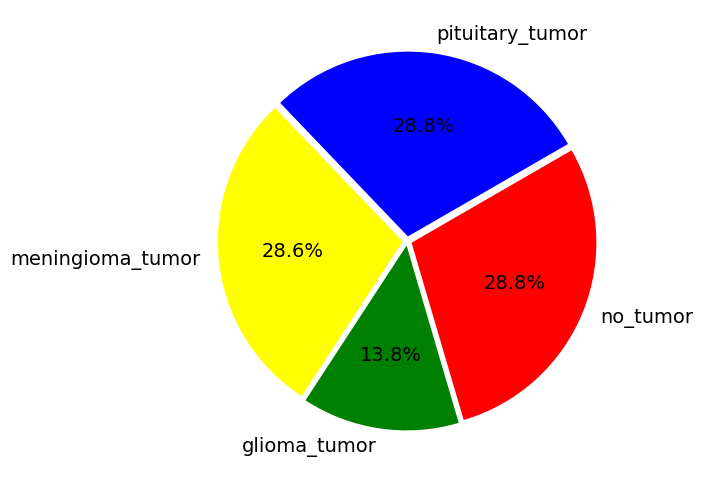

In [6]:
plt.figure(figsize=(14,6))

colors = ['blue', 'yellow', 'green', 'red']
plt.rcParams.update({'font.size': 14})

plt.pie([len([x for x in train_labels if x=='pituitary_tumor']),
         len([x for x in train_labels if x=='meningioma_tumor']),
         len([x for x in train_labels if x=='no_tumor']),
         len([x for x in train_labels if x=='glioma_tumor'])],
       
        labels=['pituitary_tumor', 'meningioma_tumor', 'glioma_tumor', 'no_tumor'],
        
        colors=colors, autopct='%.1f%%', explode=(0.025,0.025,0.025,0.025),
        startangle=30);

# 1.2 Testing Data

In [7]:
test_dir = '/kaggle/input/brain-tumor-classification-mri/Testing'

test_paths = []
test_labels = []

# Iterate over each directory in train_dir
for label in os.listdir(test_dir):
    label_path = os.path.join(test_dir, label)
    # Check if it's a directory
    if os.path.isdir(label_path):
        # Iterate over each image file in the label directory
        for image in os.listdir(label_path):
            image_path = os.path.join(label_path, image)
            test_paths.append(image_path)
            test_labels.append(label)

# Shuffle the train_paths and train_labels in sync
test_paths, test_labels = shuffle(test_paths, test_labels)

In [8]:
print(test_labels[:5])

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'meningioma_tumor', 'no_tumor']


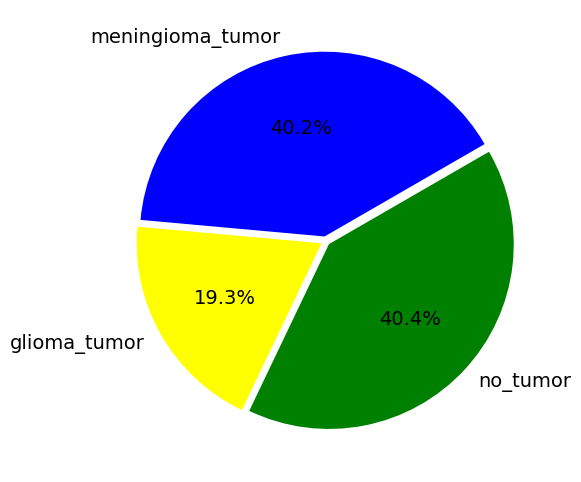

In [9]:
plt.figure(figsize=(14,6))

colors = ['blue', 'yellow', 'green']
plt.rcParams.update({'font.size': 14})

plt.pie([
         len([x for x in train_labels if x=='meningioma_tumor']),
         len([x for x in train_labels if x=='no_tumor']),
         len([x for x in train_labels if x=='glioma_tumor'])],
       
        labels=['meningioma_tumor', 'glioma_tumor', 'no_tumor'],
        
        colors=colors, autopct='%.1f%%', explode=(0.025,0.025,0.025),
        startangle=30);

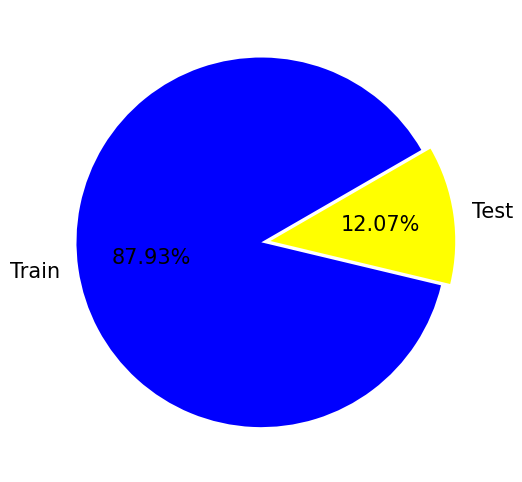

In [10]:
plt.figure(figsize=(14,6))
colors = ['blue', 'yellow', 'green', 'red']
plt.rcParams.update({'font.size': 15})
plt.pie([len(train_labels), len(test_labels)],
        labels=['Train','Test'],
        colors=colors, autopct='%.2f%%', explode=(0.05,0),
        startangle=30);

# Obs:

We have classified brain tumors into different categories and analyzed that 87% of the training data consists of brain tumors.

And 12% of the testing data consists of brain tumors.

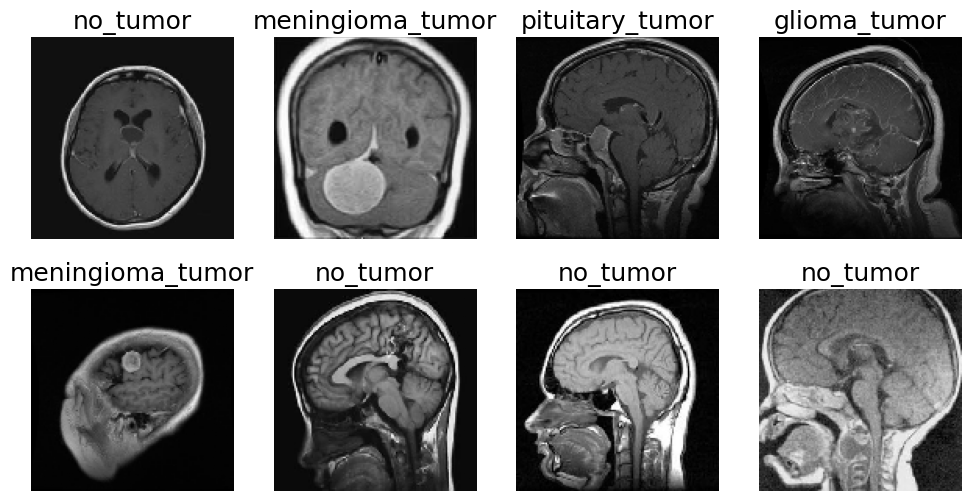

In [11]:
# from tensorflow.keras.preprocessing.image import load_img, img_to_array

# augment_image function: A placeholder function for image augmentation. It converts the image to a numpy array and normalizes pixel values to the range [0, 1]. 
# You can replace this with actual augmentation logic (e.g., rotation, flipping, etc.).
# IMAGE_SIZE = 130

def augment_image(image):
    # Dummy augmentation function, replace with actual augmentations if needed
    # Here we're just converting image to array and normalizing it
    return img_to_array(image) / 255.0

def open_images(paths):
    '''
    Given a list of paths to images, this function returns the images as arrays (after augmenting them)
    '''
    images = []
    for path in paths:
        image = load_img(path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
        image = augment_image(image)
        images.append(image)
    return np.array(images)

# Load a subset of images and their labels
images = open_images(train_paths[50:59])
labels = train_labels[50:59]

# Plot the images with their labels
fig = plt.figure(figsize=(12, 6))
for x in range(1, 9):
    fig.add_subplot(2, 4, x)
    plt.axis('off')
    plt.title(labels[x-1])  # Corrected index to avoid IndexError
    plt.imshow(images[x-1])
plt.rcParams.update({'font.size': 12})
plt.show()


In [12]:
# Convert labels to integers
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
train_labels_one_hot = to_categorical(train_labels_encoded)

In [13]:
# Split data into training and validation sets
x_train, x_test, y_train, y_test = train_test_split(
    open_images(train_paths), train_labels_encoded, test_size=0.2, random_state=42)

## glioma Tumor:
A glioma is a type of tumor that arises from glial cells in the brain or spine. Glial cells are supportive cells that help nourish, insulate, and provide structural support to neurons. 

## Malignant Tumor: 
Also known as cancerous tumors, malignant brain tumors are more aggressive than benign tumors. They grow rapidly and invade nearby healthy brain tissue. Malignant tumors can also spread to other parts of the central nervous system (CNS) or to other organs in the body through the bloodstream or lymphatic system.


## Pituitary Tumor: 
This type of tumor develops in the pituitary gland, which is located at the base of the brain. Pituitary tumors can be benign or malignant. They can affect hormone levels and cause a variety of symptoms depending on their size and hormone-secreting activity.

# CNN 

In [14]:
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(130, 130, 3)))

model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation='relu'))

model.add(MaxPooling2D(2, 2))


model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30752)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,936,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,957,930 (15.10 MB)

 Trainable params: 3,957,930 (15.10 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy',
             metrics=['sparse_categorical_accuracy'])

In [16]:
history = model.fit(x_train, y_train, 
                    batch_size=BATCH_SIZE, 
                    epochs=EPOCHS, 
                    validation_data=(x_test, y_test))

Epoch 1/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 43s 582ms/step - loss: 1.4265 - sparse_categorical_accuracy: 0.4213 - val_loss: 0.9318 - val_sparse_categorical_accuracy: 0.5645
Epoch 2/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 41s 573ms/step - loss: 0.8810 - sparse_categorical_accuracy: 0.6289 - val_loss: 0.7200 - val_sparse_categorical_accuracy: 0.6951
Epoch 3/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 41s 575ms/step - loss: 0.6670 - sparse_categorical_accuracy: 0.7317 - val_loss: 0.6848 - val_sparse_categorical_accuracy: 0.7247
Epoch 4/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 41s 576ms/step - loss: 0.5990 - sparse_categorical_accuracy: 0.7512 - val_loss: 0.6485 - val_sparse_categorical_accuracy: 0.7282
Epoch 5/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 41s 576ms/step - loss: 0.5433 - sparse_categorical_accuracy: 0.7928 - val_loss: 0.5419 - val_sparse_categorical_accuracy: 0.7909


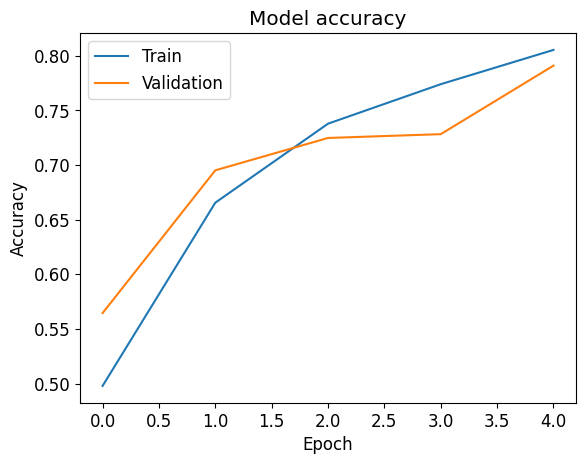

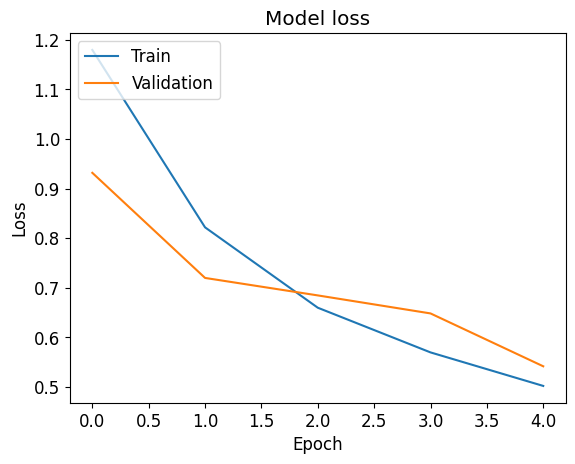

In [17]:
# Plot training & validation accuracy values
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluation Model 

In [18]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print('Test accuracy:', accuracy)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - loss: 0.5711 - sparse_categorical_accuracy: 0.7789
Test accuracy: 0.7909407615661621


In [19]:
pred = model.predict(x_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step


# classification report and confusion metrix

18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step


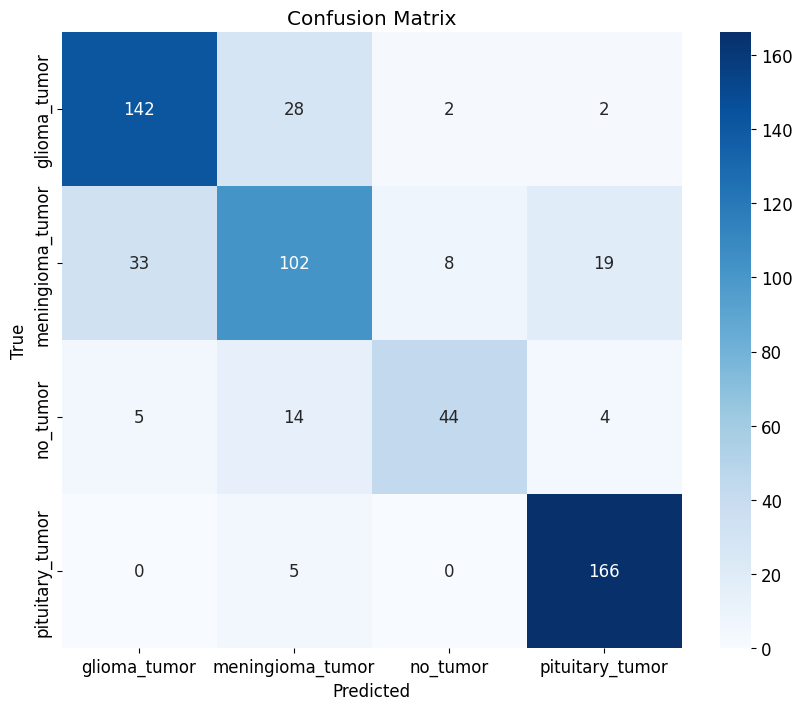

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the labels for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [21]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, np.argmax(model.predict(x_test), axis=1), target_names=label_encoder.classes_))



18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step
                  precision    recall  f1-score   support

    glioma_tumor       0.79      0.82      0.80       174
meningioma_tumor       0.68      0.63      0.66       162
        no_tumor       0.81      0.66      0.73        67
 pituitary_tumor       0.87      0.97      0.92       171

        accuracy                           0.79       574
       macro avg       0.79      0.77      0.78       574
    weighted avg       0.79      0.79      0.79       574

